In [558]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [559]:
x_train=pd.read_excel('Data_Train.xlsx')
x_test=pd.read_excel('Test_set.xlsx')

In [560]:
x_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [561]:
x_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [562]:
x_train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [563]:
x_train.drop(["Additional_Info"], axis = 1, inplace = True)

In [564]:
x_train.shape

(10683, 10)

In [565]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Price            10683 non-null  int64 
dtypes: int64(1), object(9)
memory usage: 834.7+ KB


In [566]:
x_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Price              0
dtype: int64

In [567]:
x_train.dropna(inplace=True)

In [568]:
x_train.shape

(10682, 10)

In [569]:
x_train.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Price              0
dtype: int64

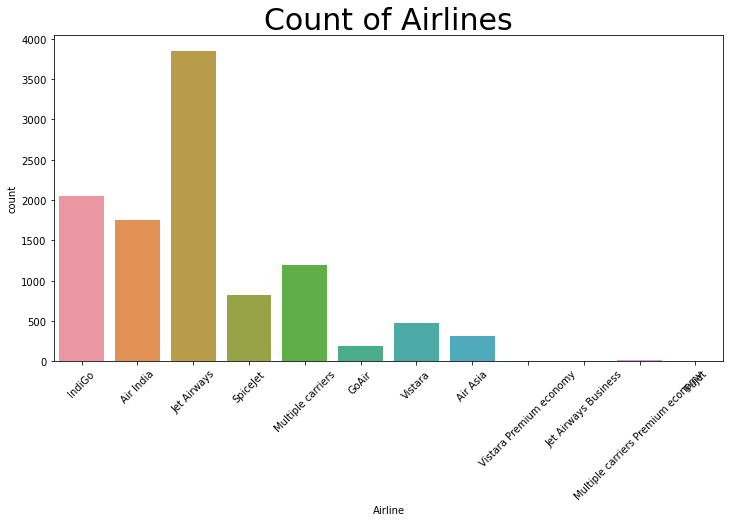

In [570]:
plt.figure(figsize=(12,6))
sns.countplot(x_train['Airline'])
plt.title('Count of Airlines', size=30)
plt.xticks(rotation=45)
plt.show()

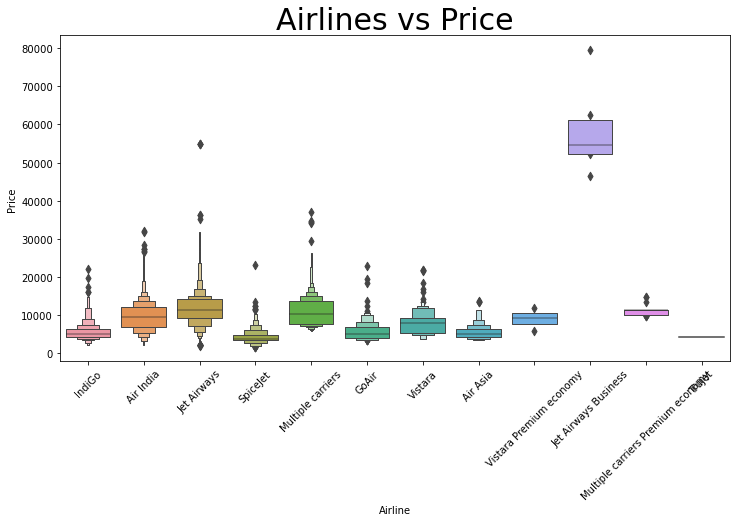

In [571]:
plt.figure(figsize=(12,6))
sns.boxenplot(x_train['Airline'], x_train['Price'])
plt.title('Airlines vs Price', size=30)
plt.xticks(rotation=45)
plt.show()

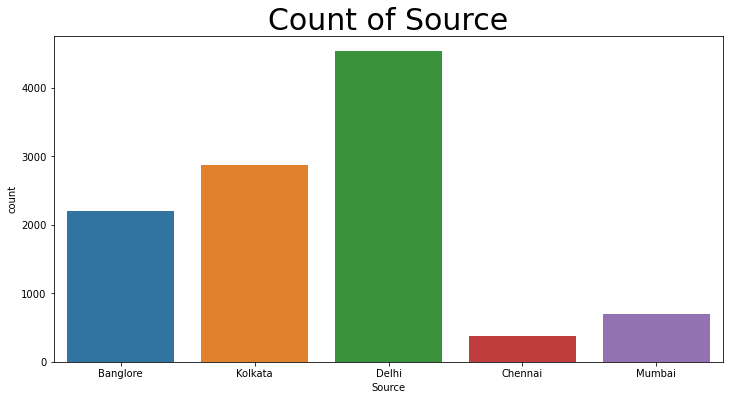

In [572]:
plt.figure(figsize=(12,6))
sns.countplot(x_train['Source'])
plt.title('Count of Source', size=30)
plt.show()

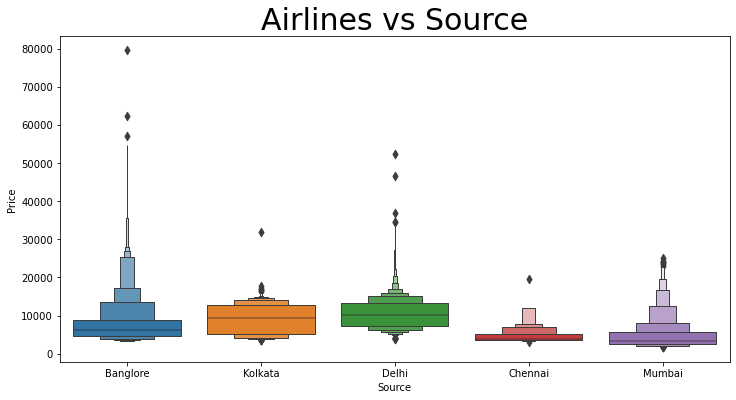

In [573]:
plt.figure(figsize=(12,6))
sns.boxenplot(x_train['Source'], x_train['Price'])
plt.title('Airlines vs Source', size=30)
plt.show()

In [574]:
x_train["Journey_day"] = pd.to_datetime(x_train.Date_of_Journey, format="%d/%m/%Y").dt.day
x_train["Journey_month"] = pd.to_datetime(x_train.Date_of_Journey, format="%d/%m/%Y").dt.month

In [575]:
x_train.drop(["Date_of_Journey"], axis = 1, inplace = True)

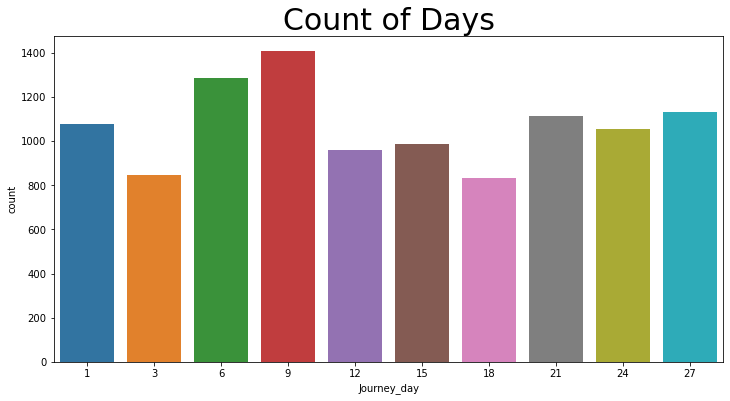

In [576]:
plt.figure(figsize=(12,6))
sns.countplot(x_train['Journey_day'])
plt.title('Count of Days', size=30)
plt.show()

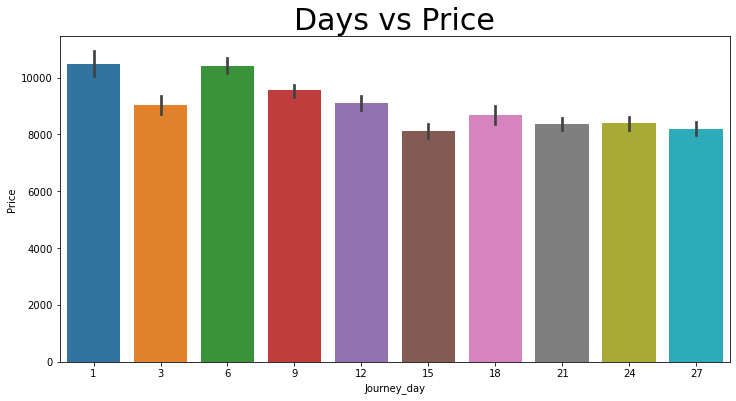

In [577]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['Journey_day'], x_train['Price'])
plt.title('Days vs Price', size=30)
plt.show()

In [578]:
x_train['Journey_month'] = x_train['Journey_month'].map({
    1:'JAN',
    2:'FEB',
    3:'MAR',
    4:'APR',
    5:'MAY',
    6:'JUN',
    7:'JUL',
    8:'AUG',
    9:'SEP',
    10:'OCT',
    11:'NOV',
    12:'DEC'
})

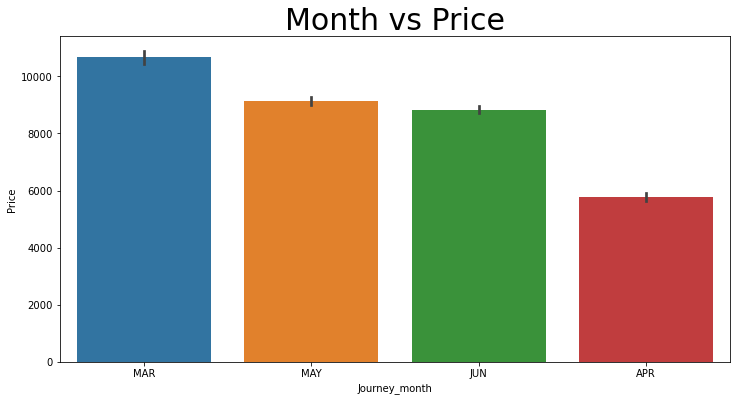

In [579]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['Journey_month'], x_train['Price'])
plt.title('Month vs Price', size=30)
plt.show()

In [580]:
x_train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,3897,24,MAR
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,7662,1,MAY
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,13882,9,JUN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,6218,12,MAY
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,13302,1,MAR


In [581]:
# Extracting Hours
x_train["Dep_hour"] = pd.to_datetime(x_train["Dep_Time"]).dt.hour

# Now we can drop Dep_Time as it is of no use
x_train.drop(["Dep_Time"], axis = 1, inplace = True)

In [582]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
x_train['dep_period_of_day'] = pd.cut(x_train.Dep_hour, bins, labels=names).astype(object)
x_train.drop(["Dep_hour"], axis = 1, inplace = True)
x_train['dep_period_of_day'].head()

0            night
1    early_morning
2          morning
3          evening
4        afternoon
Name: dep_period_of_day, dtype: object

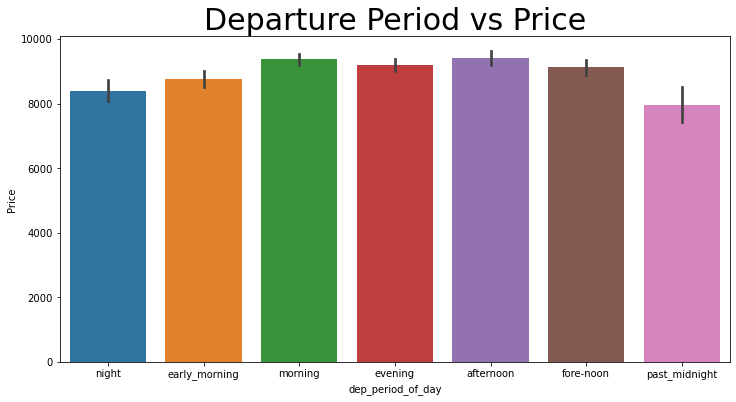

In [583]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['dep_period_of_day'], x_train['Price'])
plt.title('Departure Period vs Price', size=30)
plt.show()

In [584]:
# Extracting Hours
x_train["Arrival_hour"] = pd.to_datetime(x_train.Arrival_Time).dt.hour

# Now we can drop Arrival_Time as it is of no use
x_train.drop(["Arrival_Time"], axis = 1, inplace = True)

In [585]:
#lets find out departure period of day
bins = [-1, 3, 6, 9, 12, 16, 20, 24]  # Factorize according to the time period of the day.
names = ["past_midnight", "early_morning", "morning", 'fore-noon', 'afternoon', 'evening', 'night']
x_train['arrival_period_of_day'] = pd.cut(x_train.Arrival_hour, bins, labels=names).astype(object)
x_train.drop(["Arrival_hour"], axis = 1, inplace = True)
x_train['arrival_period_of_day'].head()

0    past_midnight
1        afternoon
2    early_morning
3            night
4            night
Name: arrival_period_of_day, dtype: object

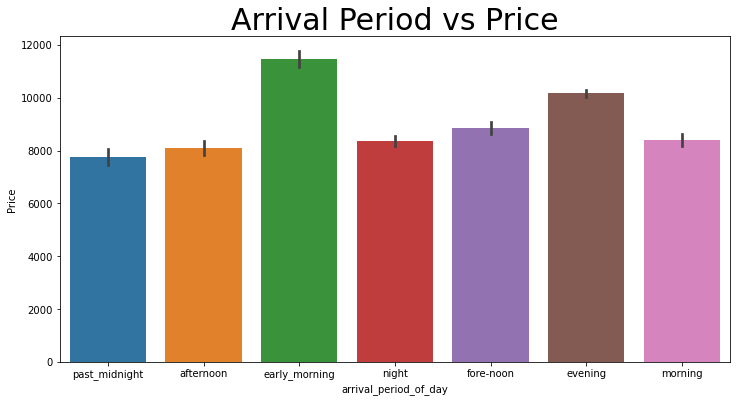

In [586]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['arrival_period_of_day'], x_train['Price'])
plt.title('Arrival Period vs Price', size=30)
plt.show()

In [587]:
duration = list(x_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [588]:
# Adding duration_hours and duration_mins list to train_data dataframe

x_train["Duration_hours"] = duration_hours
x_train["Duration_mins"] = duration_mins

In [589]:
x_train['Duration'] = (x_train['Duration_hours'])+(x_train['Duration_mins']/60)

In [590]:
x_train.drop(["Duration_hours"], axis = 1, inplace = True)
x_train.drop(["Duration_mins"], axis = 1, inplace = True)

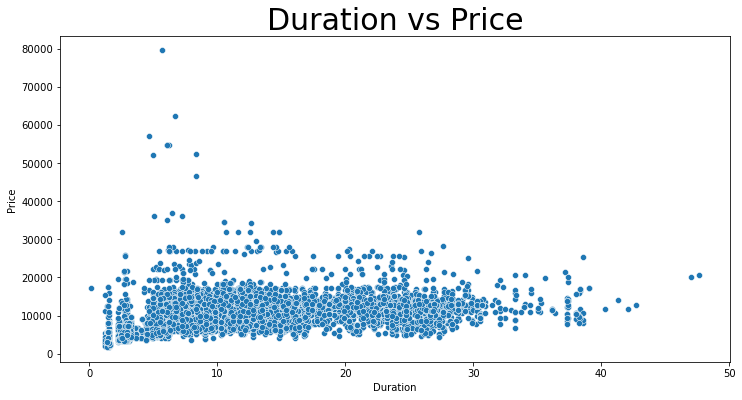

In [591]:
plt.figure(figsize=(12,6))
sns.scatterplot(x_train['Duration'], x_train['Price'])
plt.title('Duration vs Price', size=30)
plt.show()

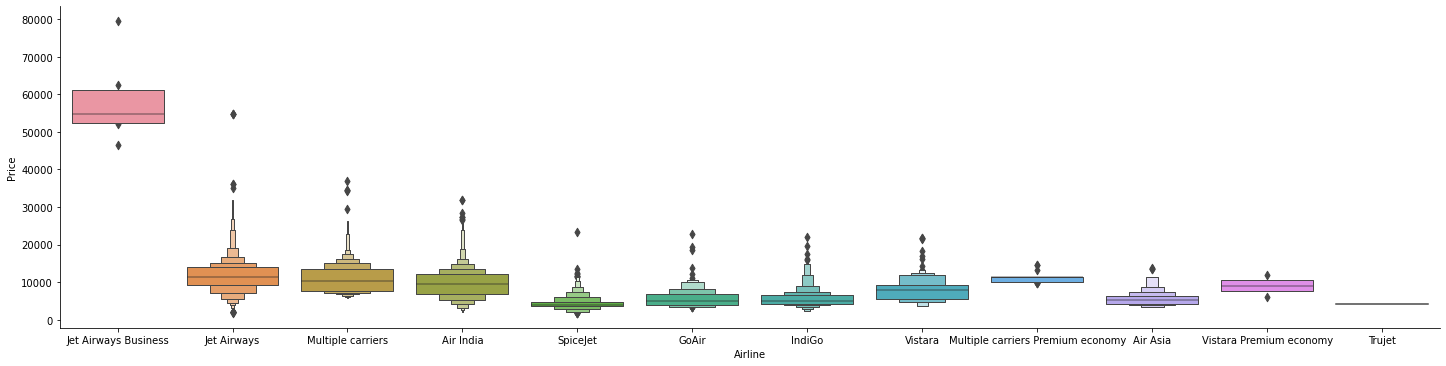

In [592]:
sns.catplot(y = "Price", x = "Airline", data = x_train.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 4)
plt.show()

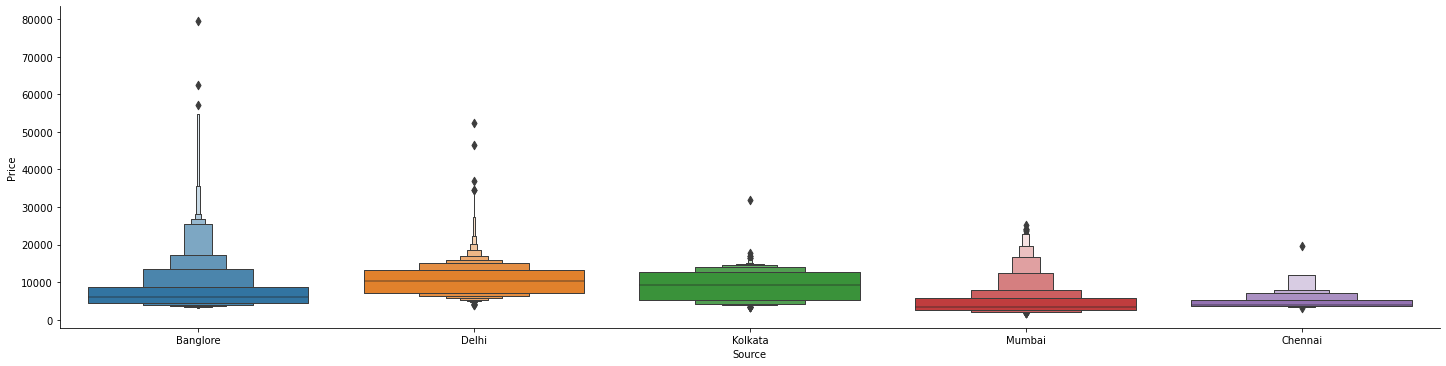

In [593]:
sns.catplot(y = "Price", x = "Source", data = x_train.sort_values("Price", ascending = False), kind="boxen", height = 5, aspect = 4)
plt.show()

In [594]:
x_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_period_of_day,arrival_period_of_day
0,IndiGo,Banglore,New Delhi,BLR → DEL,2.833333,non-stop,3897,24,MAR,night,past_midnight
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7.416667,2 stops,7662,1,MAY,early_morning,afternoon
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19.000000,2 stops,13882,9,JUN,morning,early_morning
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5.416667,1 stop,6218,12,MAY,evening,night
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4.750000,1 stop,13302,1,MAR,afternoon,night


In [595]:
x_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

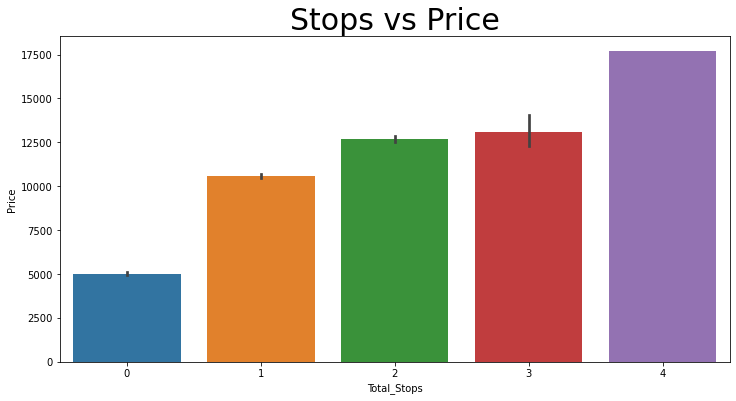

In [596]:
plt.figure(figsize=(12,6))
sns.barplot(x_train['Total_Stops'], x_train['Price'])
plt.title('Stops vs Price', size=30)
plt.show()

In [597]:
x_train['Route_1']=x_train['Route'].str.split('→ ').str[0]
x_train['Route_2']=x_train['Route'].str.split('→ ').str[1]
x_train['Route_3']=x_train['Route'].str.split('→ ').str[2]
x_train['Route_4']=x_train['Route'].str.split('→ ').str[3]
x_train['Route_5']=x_train['Route'].str.split('→ ').str[4]

In [598]:
x_train['Route_1'].fillna("None",inplace=True)
x_train['Route_2'].fillna("None",inplace=True)
x_train['Route_3'].fillna("None",inplace=True)
x_train['Route_4'].fillna("None",inplace=True)
x_train['Route_5'].fillna("None",inplace=True)

In [599]:
x_train.drop(['Route'],axis=1,inplace=True)

In [600]:
x_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_period_of_day,arrival_period_of_day,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,2.833333,0,3897,24,MAR,night,past_midnight,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,7.416667,2,7662,1,MAY,early_morning,afternoon,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,19.000000,2,13882,9,JUN,morning,early_morning,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,5.416667,1,6218,12,MAY,evening,night,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,4.750000,1,13302,1,MAR,afternoon,night,BLR,NAG,DEL,None,None


In [601]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x_train["Airline"]=encoder.fit_transform(x_train['Airline'])
x_train["Source"]=encoder.fit_transform(x_train['Source'])
x_train["Destination"]=encoder.fit_transform(x_train['Destination'])
x_train["Journey_month"]=encoder.fit_transform(x_train['Journey_month'])
x_train["dep_period_of_day"]=encoder.fit_transform(x_train['dep_period_of_day'])
x_train["arrival_period_of_day"]=encoder.fit_transform(x_train['arrival_period_of_day'])
x_train["Route_1"]=encoder.fit_transform(x_train['Route_1'])
x_train["Route_2"]=encoder.fit_transform(x_train['Route_2'])
x_train["Route_3"]=encoder.fit_transform(x_train['Route_3'])
x_train["Route_4"]=encoder.fit_transform(x_train['Route_4'])
x_train["Route_5"]=encoder.fit_transform(x_train['Route_5'])

In [602]:
x_train.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_day,Journey_month,dep_period_of_day,arrival_period_of_day,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,2.833333,0,3897,24,2,5,6,0,13,24,12,4
1,1,3,0,7.416667,2,7662,1,3,1,0,2,25,1,3,4
2,4,2,1,19.000000,2,13882,9,1,4,1,3,32,4,5,4
3,3,3,0,5.416667,1,6218,12,3,2,5,2,34,3,12,4
4,3,0,5,4.750000,1,13302,1,2,0,5,0,34,8,12,4


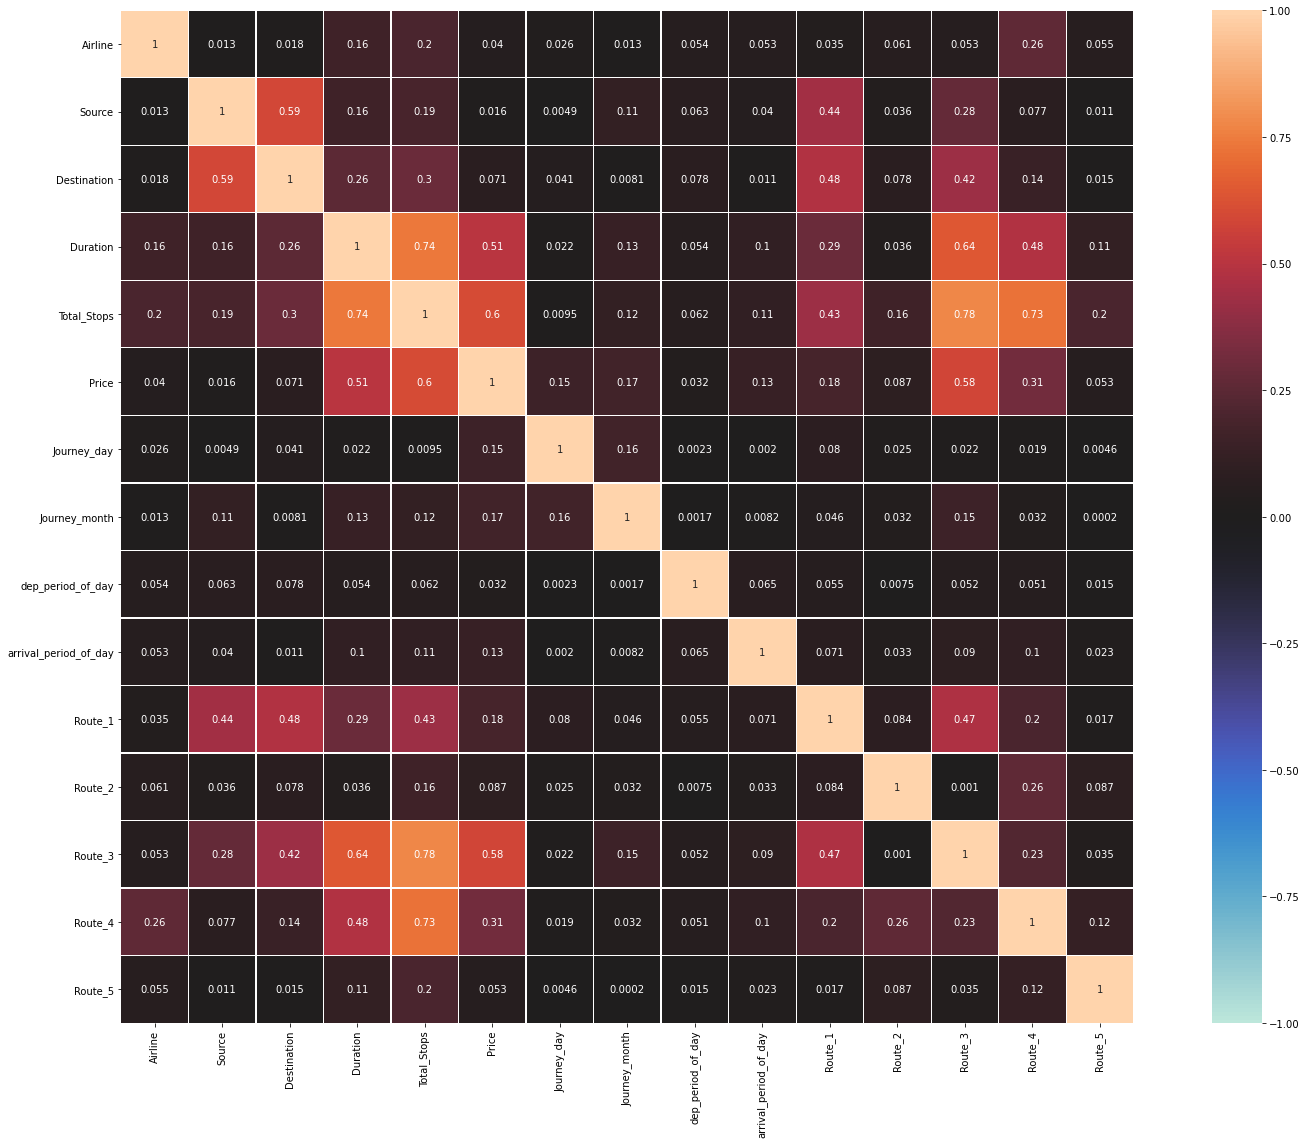

In [603]:
corr=x_train.corr().abs()
plt.figure(figsize=(22,16))
sns.heatmap(corr, vmin=-1,vmax=1, annot=True,
            square=True, center=0, fmt='.2g',linewidths=.1)
plt.tight_layout()

In [604]:
X = x_train.drop('Price', axis=1)
y = x_train['Price']

In [605]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')


In [606]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) ####

In [607]:
models = [['LinearRegression : ', LinearRegression()],
          ['Lasso : ', Lasso()],
          ['Ridge : ', Ridge()],
          ['KNeighborsRegressor : ', KNeighborsRegressor()],
          ['DecisionTreeRegressor : ', DecisionTreeRegressor()],
          ['RandomForestRegressor : ', RandomForestRegressor()],
          ['AdaBoostRegressor : ', AdaBoostRegressor()],
          ['GradientBoostingRegressor : ', GradientBoostingRegressor()],
          ['XGBRegressor : ', XGBRegressor()]]

In [608]:
for name, model in models:
    model=model
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name, (np.sqrt(mean_squared_error(y_test, predictions))))

LinearRegression :  3129.2886119314353
Lasso :  3129.154116687427
Ridge :  3129.1812954046427
KNeighborsRegressor :  2650.5216436433675
DecisionTreeRegressor :  2540.1565543947245
RandomForestRegressor :  2049.112419124615
AdaBoostRegressor :  3811.033521651913
GradientBoostingRegressor :  2070.4111548993214
XGBRegressor :  1789.5519836765864


In [609]:
algorithms = {
    'XGBRegressor' : {
        'model' : XGBRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'gamma' : [0.1,0.2, 0.3, 0.4, 0.5],
            'min_child_weight' : [1, 3, 5, 7, 9],
            'colsample_bytree' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30]
        }
    },
    'RandomForestRegressor' : {
        'model' : RandomForestRegressor(),
        'param' : {
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'max_depth' : [3, 5, 7, 9, 11, 13, 15],
            'max_features' : ["auto", "sqrt", "log2"],
            'min_samples_split' : [2, 4, 6, 8]
        }
    },
    'GradientBoostingRegressor' : {
        'model' : GradientBoostingRegressor(),
        'param' : {
            'learning_rate' : [0.5, 0.8, 0.1, 0.20, 0.25, 0.30],
            'n_estimators' : [300, 500, 700, 1000, 2100],
            'criterion' : ['friedman_mse', 'mse']
        }
    }
}

In [610]:
score = []

for name, mp in algorithms.items() :
    rs = RandomizedSearchCV(estimator = mp['model'], param_distributions = mp['param'], cv = 10, n_jobs=-1, verbose=3)
    rs.fit(X_train, y_train)
    score.append({
        'model': name,
        'score' : rs.best_score_,
        'params' : rs.best_params_
    })

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.1min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.2min finished


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.0min finished


In [611]:
final = pd.DataFrame(score, columns=['model', 'score', 'params'])
final

,model,score,params
0,XGBRegressor,0.814705,"{'min_child_weight': 7, 'max_depth': 7, 'learn..."
1,RandomForestRegressor,0.817201,"{'n_estimators': 700, 'min_samples_split': 4, ..."
2,GradientBoostingRegressor,0.824758,"{'n_estimators': 1000, 'learning_rate': 0.2, '..."


In [612]:
final['params'][2]

{'n_estimators': 1000, 'learning_rate': 0.2, 'criterion': 'mse'}

In [613]:
reg = GradientBoostingRegressor(n_estimators = 1000, learning_rate = 0.2, criterion = 'friedman_mse')
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
print('RMSE : {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

RMSE : 1756.380894530016


In [614]:
reg.score(X_train, y_train), reg.score(X_test, y_test)

(0.8909986051866219, 0.8503434777588083)

In [615]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 1191.7587096782627
RMSE: 1756.380894530016


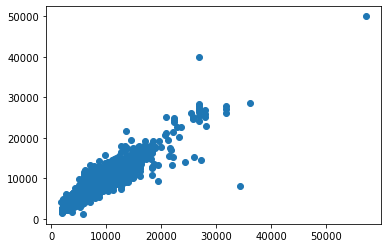

In [616]:
plt.scatter(y_test,y_pred)

In [617]:
import pickle
with open ('FlightPricePrediction.sav','wb') as f:
    pickle.dump(reg,f)